In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

from utils.utils import bar_chart, cat_map

#setting the display options for Pandas to ensure we see all the fields in our dataset
pd.options.display.max_rows = 100
%matplotlib inline

In [2]:
dc_nbrhds_geo = gpd.read_file('data/dcgis/Neighborhood_Clusters.geojson')
abnb_dc_geo = gpd.read_file('data/abnb_dc_listing_geo.json')

In [5]:
abnb_dc_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      6671 non-null   int64   
 1   neighbourhood_cleansed  6671 non-null   object  
 2   latitude                6671 non-null   float64 
 3   longitude               6671 non-null   float64 
 4   property_type           6671 non-null   object  
 5   room_type               6671 non-null   object  
 6   accommodates            6671 non-null   int64   
 7   bathrooms               6671 non-null   float64 
 8   bedrooms                6671 non-null   float64 
 9   beds                    6671 non-null   float64 
 10  price                   6671 non-null   float64 
 11  minimum_nights          6671 non-null   int64   
 12  maximum_nights          6671 non-null   int64   
 13  number_of_reviews       6671 non-null   int64   
 14  index_right     

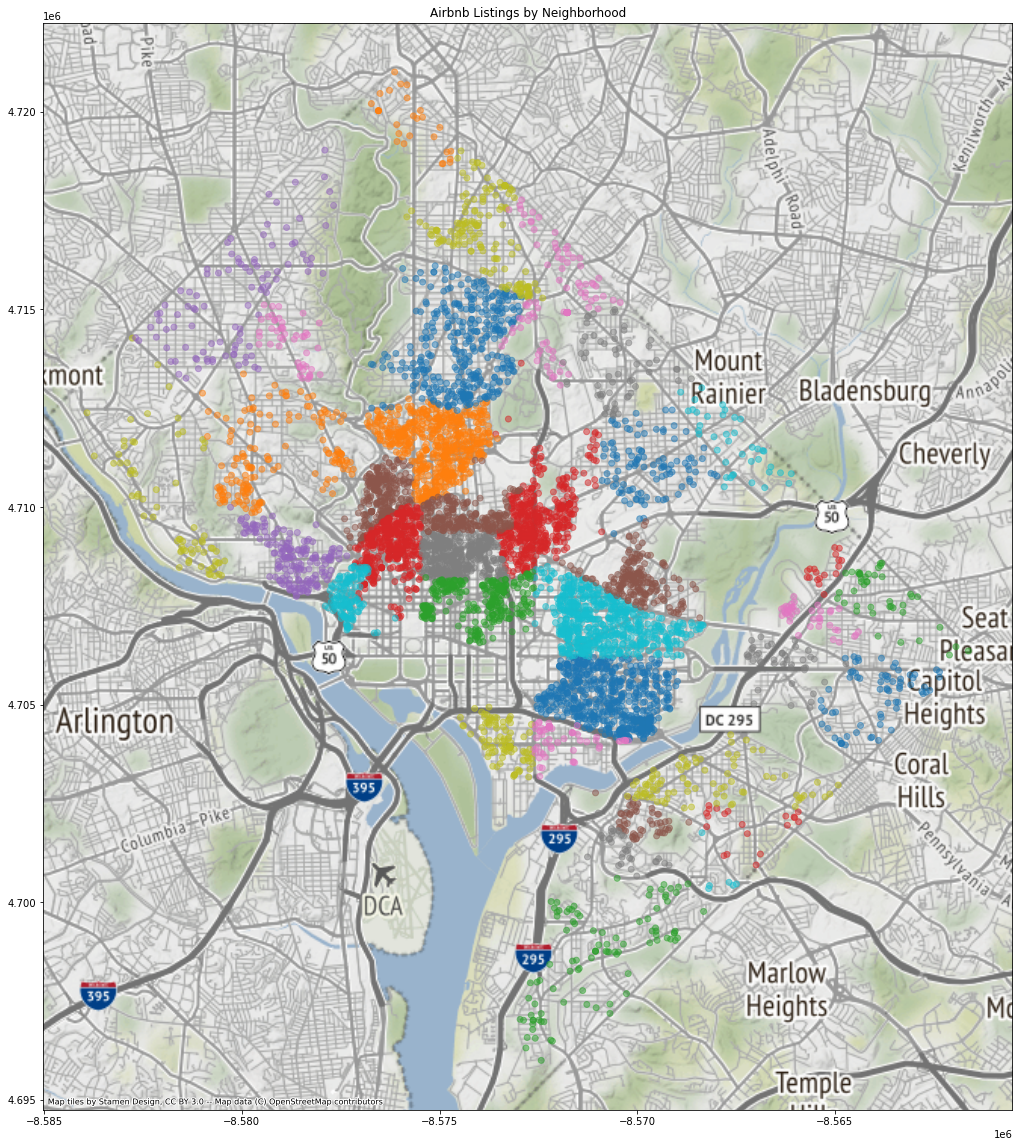

In [6]:
cat_map(abnb_dc_geo,'NBH_NAMES','Airbnb Listings by Neighborhood')

In [11]:
abnb_dc_geo_mean_prc_nbrhood = abnb_dc_geo.groupby("NBH_NAMES")["price"].mean()
dc_nbrhds_geo_MEAN_PRC_NBRHD = dc_nbrhds_geo.merge(abnb_dc_geo_mean_prc_nbrhood, on="NBH_NAMES")

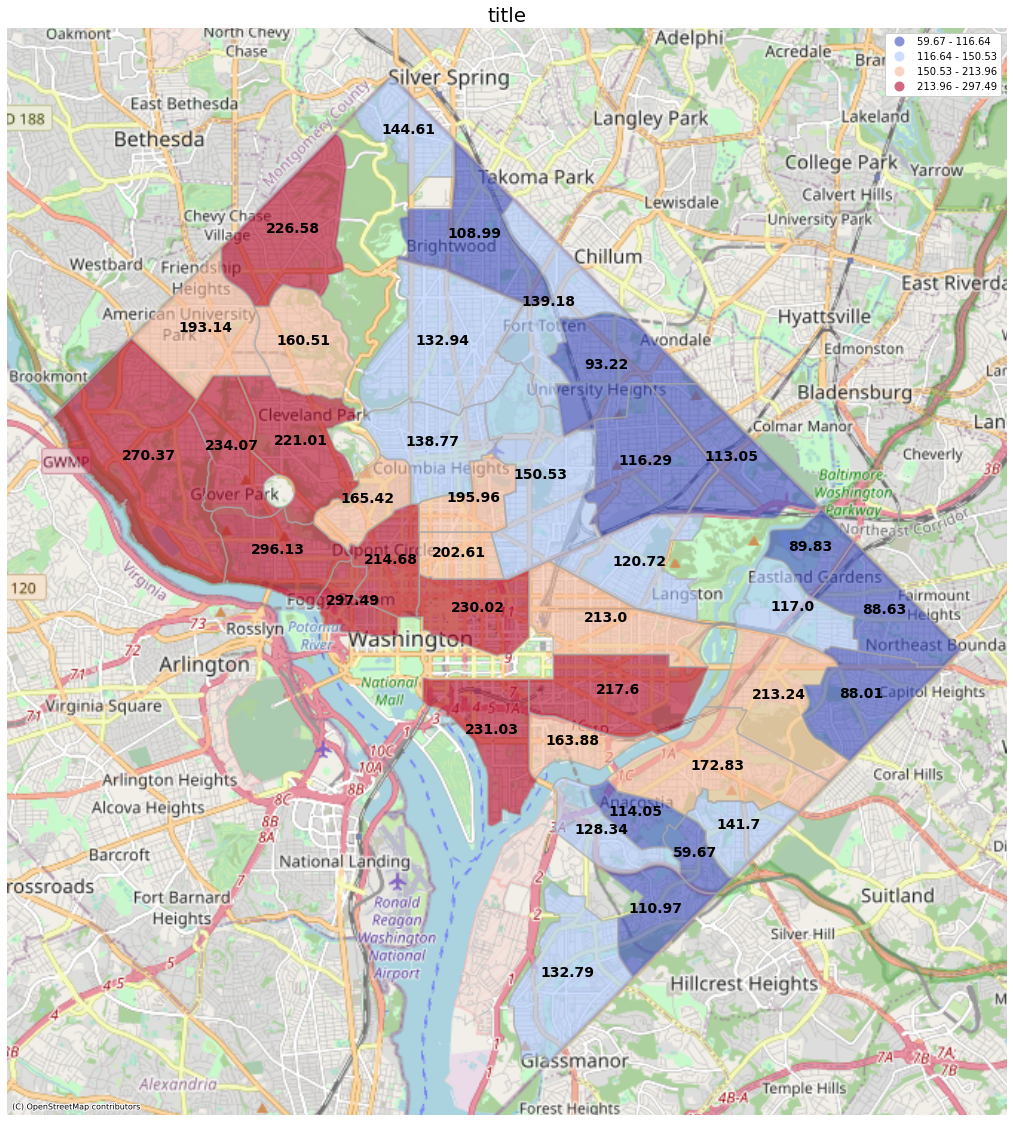

In [94]:
gdf_webmerc = dc_nbrhds_geo_MEAN_PRC_NBRHD.to_crs(epsg=3857)
# ax = gdf_webmerc.plot(column='price', cmap = 'Spectral_r', figsize=(20, 20),scheme='quantiles', k=3, legend =True, alpha=0.6, edgecolor='black', linewidth=2);

ax = gdf_webmerc.plot(column='price', cmap = 'coolwarm', figsize=(20, 20),scheme='quantiles', k=4, alpha=0.6, edgecolor='darkgray', linewidth=2, legend=True,legend_kwds=dict(loc='best', facecolor='white',framealpha=1));
ax.set_title(label="title", fontdict={'fontsize':20})
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.axis('off')
for x, y, label in zip(gdf_webmerc.centroid.x, gdf_webmerc.centroid.y, gdf_webmerc.price):
    ax.annotate(round(label, 2), xy=(x, y),horizontalalignment='center', fontsize=14, fontweight='bold')
    # show the subplot
    ax.figure
